# Big Data Midterm Project
### by Mark


In [84]:
# Importing all necessary modules
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('item_reviews.csv')

## Abstract
In this midterm project, we are going to be looking at the average ratings of phones available on Amazon. I chose to do this dataset because I am curious as to which phones have got the worst/best ratings, as well as which phone companies get the most reviews and least reviews. In this lab, we are going to be answering questions such as:
- What is the highest rated phone?
- What is the lowest rated phone?
- What is the average phone rating?
- What companies get the highest average ratings on their phones?
- What companies get the most reviews on their phones? 

Throughout my analysis of this data, I am going to be making graphs of the average rating and brand, or average amount of reviews on products and brand. These graphs should be able to answer the last two questions I am asking. In this project, I am also going to be removing all products with 5 or less reviews to get rid of some data that would be false due to only 1 or 2 people giving the phone a 1 star/5 star rating or something similar to that. 

## Dataset Exploration

In [85]:
# Looking at how much data is missing, as well as the types
# Here, we can see that all data is present except for some missing data in the prices section
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
asin            792 non-null object
brand           792 non-null object
title           792 non-null object
url             792 non-null object
image           792 non-null object
rating          792 non-null float64
reviewUrl       792 non-null object
totalReviews    792 non-null int64
prices          577 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [86]:
# Looking at what the columns look like. I think the most important columns will be brand, ratings, totalReviews, and price
df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
3,B00198M12M,Nokia,Nokia 6500 Slide Black/silver Unlocked Cell Phone,https://www.amazon.com/Nokia-6500-Slide-silver...,https://m.media-amazon.com/images/I/41ss4HpLkL...,2.4,https://www.amazon.com/product-reviews/B00198M12M,5,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN


In [87]:
# Looking at the details about the column 'rating'. I am looking to see what the average, min, max, etc. data looks like
df['rating'].describe()

count    792.000000
mean       3.607576
std        0.668730
min        1.000000
25%        3.200000
50%        3.700000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [88]:
# Looking at the details of the 'totalReviews' column. Looking at min, max, average, and other pieces of data as well
df['totalReviews'].describe()

count    792.000000
mean     104.231061
std      166.242503
min        1.000000
25%        7.000000
50%       31.500000
75%      122.250000
max      984.000000
Name: totalReviews, dtype: float64

Through examining this code, I was able to discover the min, max, and average of some important columns, as well as other information from those columns which could be beneficial to know. I also found that there is no missing data except for in the prices category, which I am not going to examine much in this lab. I also found some unecessary columns in this dataset, that I will not be using at all, such as 'asin' and 'url'

## Data Modeling and Analysis
Here I am going to find what the best and worst phones that are on Amazon right now based on reviews. I am also going to make a bar graph on the number of phones released based on brand to discover which brands have the most unique phone versions on Amazon.

In [107]:
dfr = df.groupby('rating')
dfr.head(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.6,https://www.amazon.com/product-reviews/B000SKTZ0S,22,NaN
4,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,NaN
5,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.2,https://www.amazon.com/product-reviews/B001DCJAJG,12,NaN
8,B0027VKQPE,Nokia,Nokia New 1100 for Tracfone,https://www.amazon.com/New-Nokia-1100-for-Trac...,https://m.media-amazon.com/images/I/91IUe3nDP7...,3.2,https://www.amazon.com/product-reviews/B0027VKQPE,8,$99.99
9,B00280QJFU,Samsung,Samsung T301G Prepaid Phone (Tracfone),https://www.amazon.com/Samsung-T301G-Prepaid-P...,https://m.media-amazon.com/images/I/71QX+Kiri4...,3.5,https://www.amazon.com/product-reviews/B00280QJFU,133,$59.89
11,B002AS9WEA,Samsung,Samsung a167 Prepaid GoPhone (AT&T),https://www.amazon.com/Samsung-a167-Prepaid-Go...,https://m.media-amazon.com/images/I/61OXcZ-oef...,2.9,https://www.amazon.com/product-reviews/B002AS9WEA,18,$149.95
12,B002UHS0UI,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,https://www.amazon.com/Verizon-Wireless-Motoro...,https://m.media-amazon.com/images/I/61pVtPaTkM...,2.8,https://www.amazon.com/product-reviews/B002UHS0UI,201,NaN
13,B003FCO9XE,Samsung,Samsung Smooth Verizon Wireless Prepaid Mobile...,https://www.amazon.com/Samsung-Smooth-Verizon-...,https://m.media-amazon.com/images/I/61nD-TYqHm...,2.8,https://www.amazon.com/product-reviews/B003FCO9XE,76,NaN


In [90]:
# A test statement for how many products have less than a certain amount of reviews
lowReviews = 0
for x in range (int(df['totalReviews'].count())):
    if df['totalReviews'][x] <= 5:
        lowReviews=lowReviews+1
print(lowReviews)
        

168


After doing some playing around with this little block of code, I found that there are 225 products with 10 reviews or less, 199 products with 8 or less reviews, 139 products with 5 reviews or less, and 97 products with 3 reviews or less. I have decided that I am going to look at all products with more than 5 reviews to avoid the chance of getting a extremely low min or extremely high max because 2 people happened to give a product 1 star/5 stars. I am now going to drop all the data with 5 or less reviews on it

In [95]:
# Dropping all rows of data if they have 5 reviews or less
df.drop(df[df.totalReviews <= 5].index, inplace=True)

In [97]:
df['rating'].describe()

count    624.000000
mean       3.662179
std        0.491872
min        2.000000
25%        3.300000
50%        3.700000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [104]:
# Finding the lowest rated products
df.loc[df['rating'] == df['rating'].min()]

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
17,B003XREZ4O,Samsung,"Samsung Gusto, Black (Verizon Wireless)",https://www.amazon.com/Samsung-Gusto-Black-Ver...,https://m.media-amazon.com/images/I/8119wz+eOR...,2.0,https://www.amazon.com/product-reviews/B003XREZ4O,15,NaN
563,B07FMHBMRJ,Samsung,Samsung Galaxy S7 Edge 32GB SM-G935T Unlocked ...,https://www.amazon.com/Samsung-Galaxy-S7-Edge-...,https://m.media-amazon.com/images/I/61Mw6r7BJQ...,2.0,https://www.amazon.com/product-reviews/B07FMHBMRJ,6,$189.99


In [106]:
# Finding the highest rated products
df.loc[df['rating'] == df['rating'].max()]

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
611,B07HRXB728,Samsung,Samsung Galaxy S9+ Plus Verizon + GSM Unlocked...,https://www.amazon.com/Samsung-Galaxy-Plus-Ver...,https://m.media-amazon.com/images/I/61xHkX-jbp...,5.0,https://www.amazon.com/product-reviews/B07HRXB728,7,NaN


Now that we dropped the data from above, we can see that the average rating went up by .06%, the minimum went up by 1%, but the maximum stayed the same. Also, 168 rows were removed from our data.

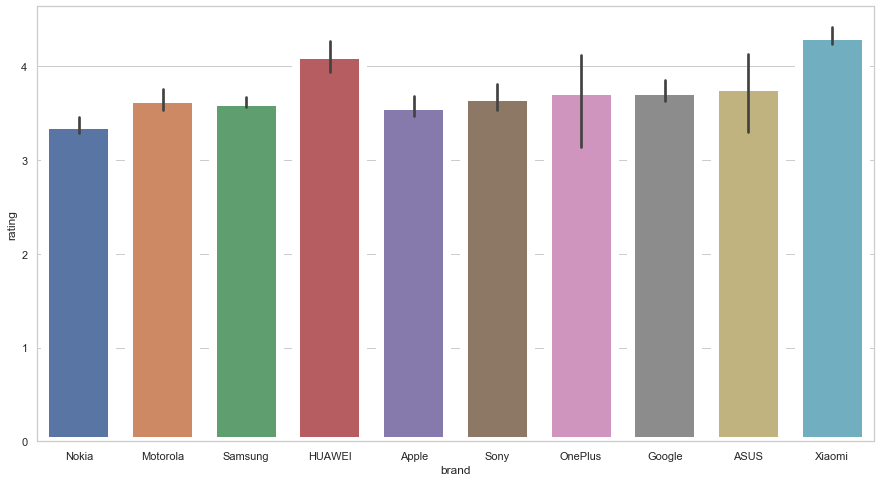

In [100]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(x='brand', y='rating', data=df, linewidth=8)

After creating a bar graph of brands and their ratings, we can see that Xiaomi has the best overall ratings, with HUAWEI coming in at second best ratings. We can also see that the lowest rated phone brand is OnePlus, but they have a much larger ___ (line). We were also able to find that the lowest reviewed phone was the ___ and that was by the brand ___ . The highest reviewed phone was the ___ which is made by ___ . This graph allows us to see something quite surprising, which is that apple has a surprisingly low average rating. 

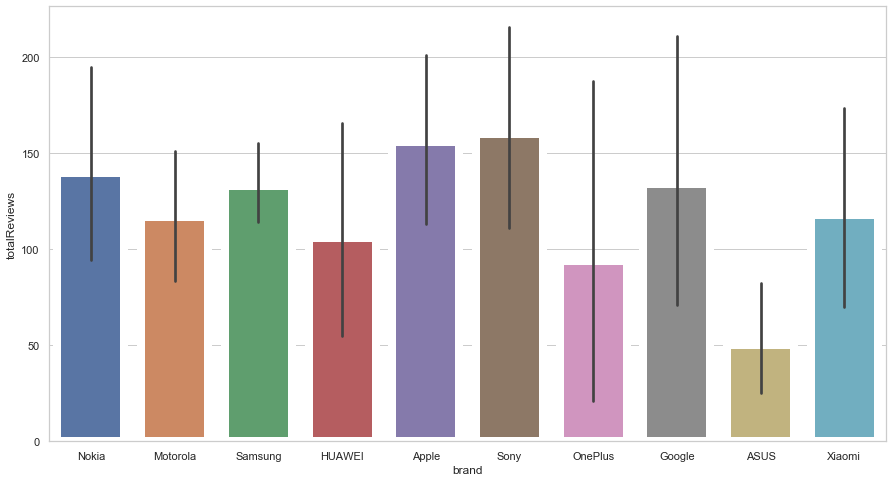

In [99]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='brand', y='totalReviews', data=df, linewidth=8)

This bar plot allows us to see the number of reviews each brand has got. This graph combined with the other graph we made allows us to see even more surprising things, such as that Xiaomi has a decently high number of reviews yet still has a high average rating, compared to a company like apple or google, both of which have a significantly high amount of total reviews and the average rating is around a 3.5-3.75 for both of them, which is the (overall total rating?)

## Conclusion
Throughout the analysis and modeling of this dataset, we learned a surprising amount of information. We learned that the average rating is a 3.66 stars, which is in the range of what I was expecting the average rating to be. I also learned that the product with the lowest average review that had 6 or more reviews was 2.0 stars, and the product with this low review score was the Samsung Gusto and the Samsung Galaxy S7 Edge, both of which are made by Samsung. I also learned that the highest average review was 5.0 stars on the Samsung Galaxy S9+ by Samsung. Something I noticed about all of these low/high star products was that they had very few reviews on them. The graphs showed us some surprising information, which is that Xiaomi had the most highly reviewed products while also having a somewhat large amount of reviewers on their products. This is a surprising piece of information because I would assume that most companies with a large amount of total reviews would have the average number of reviews for their products be around the same average as all products. I was also surprised by how little reviews ASUS had, but was not surprised by the very high average rating level. If I had to take a guess on something like that, I would assume the less total reviews a brand receives, the average star level for that brand is likely very low/high, and most likely wouldnt be the average.

## Acknowledgements


Mrs Sconyers for helping me out solve a problem I was running into in my code